In [1]:
#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info

In [2]:
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.model_selection import KFold # for cross validation
from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#load data
data = pd.read_csv("data.csv")


In [4]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print "There are "+ str(len(data))+" cases in this dataset"
print "There are {}".format(features)+" features in this dataset"
print "There are {}".format(malignant)+" cases diagnosed as malignant tumor"
print "There are {}".format(benign)+" cases diagnosed as benign tumor"
print "The percentage of malignant cases is: {:.4f}%".format(rate)

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


In [5]:

data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
#make diagnosis column numerical
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
#drop ID because we do not need the ID number as shown above

data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
#radius mean is the mean of distances from center to points on the perimeter of breast mass
#so let's look at maximum, minimum, average, and standard deviation of radius mean
min_radius = min(data['radius_mean'])
max_radius = max(data['radius_mean'])
average_radius = np.mean(data['radius_mean'])
sd_radius = np.std(data['radius_mean'])

print "Minimum of radius mean is: {:,.2f} ".format(min_radius)
print "Maximum of radius mean is: {:,.2f} ".format(max_radius)
print "Average of radius mean is: {:,.2f} ".format(average_radius)+"with a standard deviation of {:,.2f}".format(sd_radius)


Minimum of radius mean is: 6.98 
Maximum of radius mean is: 28.11 
Average of radius mean is: 14.13 with a standard deviation of 3.52


In [9]:
#bring forth visualization packages 

from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer
from bokeh.charts import Area, show, output_file, defaults
from bokeh.layouts import row
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

Loading BokehJS ...

In [10]:
#to see how distribution is in regard to the diagnosis, we need to first split
#the dataset into two groups
malignant = data[data['diagnosis'] ==1]
benign = data[data['diagnosis'] ==0]

#also bring features back, basically redefining them again- the first ten

features = list(data.columns[1:2])

In [11]:
defaults.width = 300
defaults.height = 300

In [12]:
area1 = Area(malignant[features], title="Radius mean for malignant cases", legend="top_left",
             stack=True)

area2 = Area(benign[features], title="Radius mean for benign case", legend="top_left",
             stack=True)

show(row(area1, area2))

In [34]:
#grid = gridplot(area_charts, ncols=3, plot_width=300, plot_height=300)

In [13]:
import seaborn as sns

In [14]:
from bokeh import mpl

In [17]:
import lightning

In [18]:
from lightning import Lightning

from numpy import random, asarray, sqrt, arctan2, pi, clip
from seaborn import color_palette
from sklearn import datasets
from colorsys import hsv_to_rgb


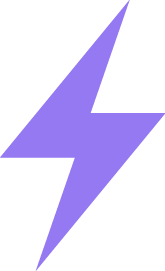

Connected to server at http://public.lightning-viz.org


<IPython.core.display.Javascript object>

In [20]:
lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')


In [27]:
lgn.scatter(data['radius_mean'], data['texture_mean'], group=data['diagnosis'], alpha=0.8, size=12)

In [29]:

from lightning import Lightning

from numpy import random, asarray, arange
from sklearn import datasets
from scipy.ndimage.filters import gaussian_filter
from seaborn import color_palette

In [38]:
lgn.line(data['radius_mean'], group=data['diagnosis'])